# Project: Health Economics

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#acronym">Acronym</a></li>  
<li><a href="#resource">Resource</a></li>     
</ul>

<a id='intro'></a>
## Introduction

> The dataset I have chosen for my project is from **Gapminder World(Health Economics)** it contains government_health_spending_of_total_gov_spending_percent,
medical_doctors_per_1000_people,out_of_pocket_share_of_total_health_spending_percent and many more datasets, but I will be using only this three datasets.

> **government_health_spending_of_total_gov_spending_percent dataset** contain government health spending as a percent from total government spending. Each of this values are recorded based on countries and year time from 1994-2009.

> **medical_doctors_per_1000_people** includes values produced based on number of doctors per 1000 people within countries and year time from 1959-2018.

> **out_of_pocket_share_of_total_health_spending_percent** recordes are calculated using the percentage of out of pocket expenditure from total health spending. This also stores values on each Country and year time from 1994-2009.
#### Questions
- Region with highest government spending has highest available Medical doctors
- Less government spending more out of pocket spending

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_govpercent = pd.read_excel('government_health_spending_of_total_gov_spending_percent.xlsx')
df_doctors = pd.read_excel('medical_doctors_per_1000_people.xlsx')
df_outofpocket = pd.read_excel('out_of_pocket_share_of_total_health_spending_percent.xlsx')
df_govpercent.head(3)
df_outofpocket.head(3)
df_doctors.head(3)

,country,1959,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.035,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,...,0.236,0.252,0.241,0.285,0.298,0.285,0.278,NaN,NaN,NaN
2,Angola,0.067,NaN,NaN,NaN,NaN,0.076,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215,NaN,NaN


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [124]:
# Assessing government_health_spending_of_total_gov_spending_percent dataset

df_govpercent.head(3)
df_govpercent.shape
df_govpercent.nunique()
df_govpercent.describe()
df_govpercent.info()

df_govpercent.duplicated().sum() # no duplicated value
df_govpercent.dtypes             # All column data type is correct 
df_govpercent.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 17 columns):
ï»¿country    192 non-null object
1994          189 non-null float64
1995          190 non-null float64
1996          190 non-null float64
1997          191 non-null float64
1998          191 non-null float64
1999          191 non-null float64
2000          191 non-null float64
2001          190 non-null float64
2002          190 non-null float64
2003          190 non-null float64
2004          190 non-null float64
2005          190 non-null float64
2006          190 non-null float64
2007          190 non-null float64
2008          190 non-null float64
2009          187 non-null float64
dtypes: float64(16), object(1)
memory usage: 25.6+ KB


ï»¿country    0
1994          3
1995          2
1996          2
1997          1
1998          1
1999          1
2000          1
2001          2
2002          2
2003          2
2004          2
2005          2
2006          2
2007          2
2008          2
2009          5
dtype: int64

In [125]:
# Assessing medical_doctors_per_1000_people dataset
df_doctors.head()
df_doctors.shape           # For cleaning need remove countries not found in the 
df_doctors.nunique()
df_doctors.describe()
df_doctors.info()

df_doctors.isnull().sum()
df_doctors.duplicated().sum()  # no duplicated value
df_doctors.dtypes              # All columns have correct dtypes  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
country    207 non-null object
1959       138 non-null object
1960       22 non-null float64
1961       16 non-null float64
1962       16 non-null float64
1963       16 non-null float64
1964       105 non-null float64
1965       22 non-null float64
1966       17 non-null float64
1967       17 non-null float64
1968       17 non-null float64
1969       142 non-null float64
1970       32 non-null float64
1971       24 non-null float64
1972       26 non-null float64
1973       23 non-null float64
1974       83 non-null float64
1975       30 non-null float64
1976       29 non-null float64
1977       26 non-null float64
1978       37 non-null float64
1979       83 non-null float64
1980       101 non-null float64
1981       49 non-null float64
1982       43 non-null float64
1983       79 non-null float64
1984       71 non-null float64
1985       65 non-null float64
1986       52 non-null f

country     object
1959        object
1960       float64
1961       float64
1962       float64
1963       float64
1964       float64
1965       float64
1966       float64
1967       float64
1968       float64
1969       float64
1970       float64
1971       float64
1972       float64
1973       float64
1974       float64
1975       float64
1976       float64
1977       float64
1978       float64
1979       float64
1980       float64
1981       float64
1982       float64
1983       float64
1984       float64
1985       float64
1986       float64
1987       float64
            ...   
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       f

In [126]:
# Data Wrangling for out_of_pocket_share_of_total_health_spending_percent dataset
df_outofpocket.head()    # last column need to be removed
df_outofpocket.shape  
df_outofpocket.nunique()
df_outofpocket.describe()
df_outofpocket.info()

df_outofpocket.isnull().sum()
df_outofpocket.duplicated().sum()  # no duplicated values
df_outofpocket.dtypes              # column 1994 have incorrect data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
country        150 non-null object
1994           147 non-null object
1995           148 non-null float64
1996           148 non-null float64
1997           149 non-null float64
1998           149 non-null float64
1999           149 non-null float64
2000           148 non-null float64
2001           148 non-null float64
2002           148 non-null float64
2003           148 non-null float64
2004           148 non-null float64
2005           148 non-null float64
2006           148 non-null float64
2007           148 non-null float64
2008           148 non-null float64
2009           148 non-null float64
Unnamed: 17    3 non-null float64
dtypes: float64(16), object(2)
memory usage: 21.2+ KB


country         object
1994            object
1995           float64
1996           float64
1997           float64
1998           float64
1999           float64
2000           float64
2001           float64
2002           float64
2003           float64
2004           float64
2005           float64
2006           float64
2007           float64
2008           float64
2009           float64
Unnamed: 17    float64
dtype: object

In [127]:
# common procedures used for cleaning each datasets
def null_fill(dataframe,Nan_list):                             # fills nan values with the mean value column wise
    for c in Nan_list:
        mean = dataframe[c].mean()
        dataframe[c].fillna(mean,inplace=True)
        
    return dataframe

def round_value(dataframe):                                   # rounds each value to two decimal point     
    return dataframe.iloc[:,1:17].round(2)
        
def plot_bar(x,y,label,title,x_label,y_label):                                              # to plt bar chart
    plt.bar(x,y,tick_label = label )
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label);

In [128]:
# Cleaning the government_health_spending_of_total_gov_spending_percent dataset
# need to create new dataframe to make changes for pre-caution

Nan_list_govpercent = df_govpercent.columns[df_govpercent.isnull().any()]      # returns years containing NaN value
df_govpercent2 = null_fill(df_govpercent,Nan_list_govpercent)                  # calls the null_fill function

# To make sure it worked
df_govpercent2.info()

# rename first column from 'ï»¿country' to 'country'
df_govpercent2 = df_govpercent2.rename(columns = {'ï»¿country':'country'})
df_govpercent2.head(3)

# All data should have the same decimal precision 
df_govpercent2.iloc[:,1:17] = round_value(df_govpercent2)                    # calls the round_value function

# Further duplicate investigation
df_govpercent2.duplicated('country').sum()                                   # to further check if there is 2 or more countries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 17 columns):
ï»¿country    192 non-null object
1994          192 non-null float64
1995          192 non-null float64
1996          192 non-null float64
1997          192 non-null float64
1998          192 non-null float64
1999          192 non-null float64
2000          192 non-null float64
2001          192 non-null float64
2002          192 non-null float64
2003          192 non-null float64
2004          192 non-null float64
2005          192 non-null float64
2006          192 non-null float64
2007          192 non-null float64
2008          192 non-null float64
2009          192 non-null float64
dtypes: float64(16), object(1)
memory usage: 25.6+ KB


0

> **df_govpercent2** now contain cleaned version of *df_govpercent* which is the original dataframe of *government_health_spending_of_total_gov_spending_percent dataset*

In [129]:
# Cleaning the medical_doctors_per_1000_people dataset
df_doctors2 = df_doctors.iloc[:,np.r_[:1,36:52]].copy()               # the dataframe to work on for pre-caution
                                                           
# slice the row
slice_country = df_govpercent2['country'] 
drop_index = df_doctors2[df_doctors2['country'].isin(slice_country) == False].index                # check if countries found in df_doctors2 are also found in df_govpercent2
df_doctors2 = df_doctors2.drop(index = drop_index)                                                 

# Fill null value
Nan_list_doctor =df_doctors2.columns[df_doctors2.isnull().any()]
df_doctors2 = null_fill(df_doctors2,Nan_list_doctor)                                               # calls the null_fill function 

# making sure every null/nan value is filled
df_doctors2.info()

# All data should have the same decimal precision 
df_doctors2.iloc[:,1:17] = round_value(df_doctors2)                                                # calls the round_value function

# Further duplicate investigation
df_doctors2.duplicated('country').sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 1 to 206
Data columns (total 17 columns):
country    187 non-null object
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64
1997       187 non-null float64
1998       187 non-null float64
1999       187 non-null float64
2000       187 non-null float64
2001       187 non-null float64
2002       187 non-null float64
2003       187 non-null float64
2004       187 non-null float64
2005       187 non-null float64
2006       187 non-null float64
2007       187 non-null float64
2008       187 non-null float64
2009       187 non-null float64
dtypes: float64(16), object(1)
memory usage: 26.3+ KB


0

> **df_doctors2** now contains the cleaned version of df_doctors dataframe. This new dataframe contains values from year 1994-2009, and also only countries both found in *government_health_spending_of_total_gov_spending_percent*, and *medical_doctors_per_1000_people* datasets.

In [130]:
# Cleaning the out_of_pocket_share_of_total_health_spending_percent dataset
df_outofpocket.head()
df_outofpocket2 = df_outofpocket.drop(['Unnamed: 17'],axis = 1)        # df_outofpocket had unwanted last column named 'Unnamed' 
df_outofpocket2.shape                                                  # for cross-checking

#df_outofpocket2[1994].astype(float)                                   # runs to error because column 1994 contain a string named ' Dem. Rep.',' Rep.',' Fed. Sts'.

# Change the data type of 1994 from string to float    '
valueerror_list = [' Dem. Rep.',' Rep.',' Fed. Sts.']
for c in valueerror_list:
    mean = df_outofpocket2[df_outofpocket2[1994] == c].iloc[:,2:17].mean(axis=1)  # therefore replace error value by the mean value row wise
    df_outofpocket2[1994].replace(c,mean, inplace=True)

# Fill null value
Nan_list_outofpocket =df_outofpocket2.columns[df_outofpocket2.isnull().any()]
df_outofpocket2 = null_fill(df_outofpocket2,Nan_list_outofpocket)                 # calls the null_fill function 
       
# All data should have the same decimal precision 
df_outofpocket2.iloc[:,1:17] = round_value(df_outofpocket2)                       # calls the round_value function

# Further duplicate investigation                                      
df_outofpocket2.duplicated('country').sum()                             # to make sure no countries have the same name, it returned with two same name countries
df_outofpocket2[df_outofpocket2.duplicated('country') == True]          # returns with the same name countries   
df_outofpocket2.drop_duplicates(subset=['country'], inplace = True)     # drop one of the duplicated contries    

df_outofpocket2.head(33)    # to make sure the duplicated row is dropped

,country,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Afghanistan,35.44,36.15,35.82,36.34,36.4,36.05,35.16,88.70,87.60,86.60,83.10,82.90,82.60,82.90,83.10,83.00
1,Angola,13.20,23.10,22.10,26.90,25.8,20.80,14.50,21.10,18.90,24.00,25.50,20.70,19.80,15.70,10.10,17.50
2,Albania,50.00,60.30,60.70,60.40,56.6,63.80,61.70,63.80,60.40,56.10,56.50,56.90,57.80,58.30,58.70,60.80
3,Andorra,26.70,26.10,25.20,18.70,25.1,26.60,21.90,22.00,22.30,21.80,22.10,21.70,22.60,22.50,22.40,22.40
4,United Arab Emirates,14.90,14.30,15.30,25.10,26.2,26.90,15.10,28.00,27.50,30.40,30.10,29.80,29.70,24.90,16.90,18.80
5,Argentina,28.00,29.80,28.80,29.10,28.6,29.10,29.30,29.80,30.70,30.60,29.40,28.40,25.00,22.20,19.90,29.90
6,Armenia,65.90,69.10,71.50,67.50,67.1,77.10,69.60,68.60,69.10,71.50,66.60,57.70,54.90,51.80,52.50,55.10
7,Antigua and Barbuda,29.20,31.20,29.60,27.90,26.7,26.90,30.00,30.30,31.30,32.20,32.00,30.20,29.60,28.60,29.30,25.80
8,Australia,16.10,16.90,16.90,19.90,18.6,19.80,19.30,18.80,18.30,18.30,18.60,18.70,18.00,18.20,19.50,20.50
9,Austria,15.20,15.70,15.50,15.40,15.2,15.30,16.10,16.20,16.40,16.00,15.70,15.80,15.40,14.70,14.50,14.60


> **df_outofpocket2** is the cleaned version of *df_outofpocket*.

In [131]:
# Last cleaning, make sure all dataframes contain the same number of row(countries) for the analysis
country_govpercent =  df_govpercent2['country']
country_doctors =  df_doctors2['country'].tolist()
country_outofpocket = df_outofpocket2['country'].tolist()

count = 0

country = []
for i in country_govpercent:
    if i in country_doctors and i in country_outofpocket:
        country.append(i)
        
dropdoctor_index = df_doctors2[df_doctors2['country'].isin(country) == False].index               # Countries to be removed from df_doctors2
df_doctors2 = df_doctors2.drop(index = dropdoctor_index) 

dropgovpercent_index = df_govpercent2[df_govpercent2['country'].isin(country) == False].index     # Countries to be removed from df_govpercent2
df_govpercent2 = df_govpercent2.drop(index = dropgovpercent_index)

dropoutofpocket_index = df_outofpocket2[df_outofpocket2['country'].isin(country) == False].index  # Countries to be removed from df_outofpocket2
df_outofpocket2 = df_outofpocket2.drop(index = dropoutofpocket_index)

print(df_govpercent2.shape)
print(df_doctors2.shape)
print(df_outofpocket2.shape)

(145, 17)
(145, 17)
(145, 17)


> In the above code cell, I made each dataframes to contain same countries to go further with the inspection. Therefore each of them have 145 rows and 17 columns.

<a id='eda'></a>
## Exploratory Data Analysis

### Region with highest government spending has highest available Medical doctors

In [132]:
# since the index number doesn't have sequence because of deleted row new to change the index values
row_number = np.arange(0,145,1)
df_govpercent2.set_index(row_number, inplace = True)


# Checking for increase in government expenditure, 
# First need to know which region is increasing monotically
for i in range(145):
    print(df_govpercent2.loc[0].is_monotonic)


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


> Inorder to make this investigation, I need to understand if the government spending was monotically increasing, but all columns returned False value. For that reason, The First methods, I used was finidng the mean value across each country(row-wise) on both government spending and doctors dataframes, then the highest mean value(highest government spending country) in the government spending dataframe would also have highest mean value in the doctors dataframe. 

In [133]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
 
df_govpercent2_mean = df_govpercent2.mean(axis = 1)     
df_govpercent2['mean_value'] = df_govpercent2_mean 
 
df_govpercent2_mean_max = df_govpercent2_mean.max()     # to find the maximum mean value
print(df_govpercent2[df_govpercent2['mean_value'] == df_govpercent2_mean_max])  # Andorra have highest government spending


df_doctors2.set_index(row_number, inplace = True)
df_doctors2_mean = df_doctors2.mean(axis = 1)  
df_doctors2['mean_value'] = df_doctors2_mean

df_doctors2_mean_max = df_doctors2_mean.max()     # to find the maximum mean value
print()
print(df_doctors2[df_doctors2['mean_value'] == df_doctors2_mean_max])  # Italy have highest medical doctors per 1000

   country  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  \
3  Andorra  23.6  23.8  23.2  28.7  20.8  19.1  19.2  20.0  22.0  22.7  22.0   

   2005  2006  2007  2008  2009  mean_value  
3  22.8  21.3  21.3  21.3  21.3    22.06875  

   country  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  \
61   Italy  5.67  5.73  5.84  5.92  5.99  6.92  7.03  7.12  7.23  7.36   7.4   

    2005  2006  2007  2008  2009  mean_value  
61   7.4  7.55  7.56  7.58  7.63    6.870625  


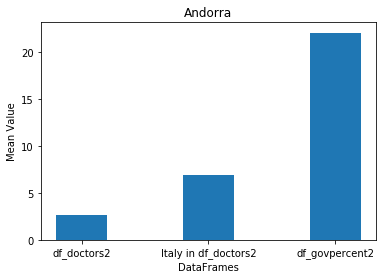

In [134]:
# using bar chart to show the above investigation
x = [1,3,5]
y = [df_doctors2.loc[3]['mean_value'],df_doctors2['mean_value'].max(),df_govpercent2.loc[3]['mean_value']]
label = ['df_doctors2','Italy in df_doctors2','df_govpercent2']
plot_bar(x,y,label,'Andorra','DataFrames','Mean Value')

> Rather than concluding only by the above investigation, I wanted to analyse further. 
> Instead of using mean values, In the second technique I look into if countries would have both high number of doctors and government spending at the same year.
> Further, I took into consideration if increase of doctors might happen after the increment of government spending.

In [135]:
# Further investigation, rather than using mean(average), check if at the time the government spending increased doctors number also increase
years_increase_govpercent = df_govpercent2.iloc[:,1:17].idxmax(axis = 1)       # used iloc because for idxmax to work the columns need to be numeric 
years_increase_doctor = df_doctors2.iloc[:,1:17].idxmax(axis = 1)

print((years_increase_govpercent == years_increase_doctor).value_counts())   # only 13 number of countries had number of doctors increase at the same year government spending increased

# what if the number of doctors increase after the increase of government spending??
years_increase_govpercent_array = np.array(years_increase_govpercent)
years_increase_doctor_array = np.array(years_increase_doctor)

difference_year = np.subtract(years_increase_govpercent_array, years_increase_doctor_array) # calculated the difference between years
value = np.where(difference_year > 0,difference_year,0)
print(value)
print(np.count_nonzero(value > 0))        # Sixty-six countries had shown increase of doctors after the increase of government spending

False    132
True      13
dtype: int64
[ 0  7  0  0  3  0  0  8  0  0  1  4  7  0  3  0  0  0 11  0  7  0 11  1
  5  3  0  0  8  8  2  0  3  0  5  0  0  0  0  0  0  0  0  2  7  0  6  1
  1  1  0  0  0  4  8 10  0  5  0  0  9  0  2  5  0  0  2  0  0  0  0  4
  5  0  2  8  2  7  8  0  0  2  0  0  0  0  0  0  3  0  0  2  0  0  0  5
  0  0  4  2  0  0  8  1  3  0  6  0  0  0  0  0  0  3  0  0  0  4  0  1
  0  0  1  0  0  7  5  0  0  0  2  3  0  0  3  8  6 15  4  8  8  0  8  4
  0]
66


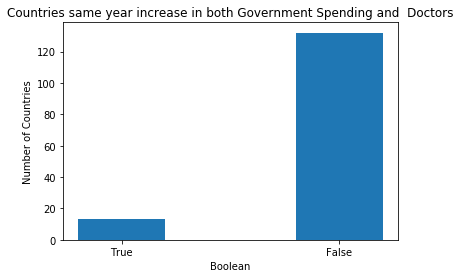

In [136]:
# using bar chart to show the investigate
x = [1,3]
y = [13,132]
label = ['True','False']
plot_bar(x,y,label,'Countries same year increase in both Government Spending and  Doctors','Boolean','Number of Countries')

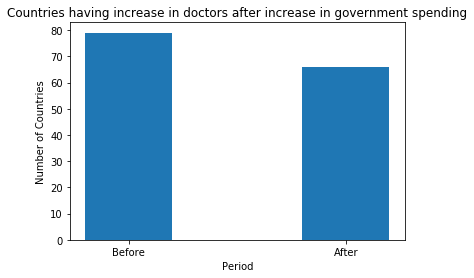

In [138]:
x = [1,3]
y = [79,66]
label = ['Before','After']
plot_bar(x,y,label,'Countries having increase in doctors after increase in government spending','Period','Number of Countries')

> In my third method to further investigate, I ought to see if their is a similar trend of increasing and decreasing of values of each country across both datasets, instead of looking into the exact number.

In [139]:
# increasing or decreasing trend 
trend = []

for c in range(145):                        # 145 is number of records on each datasets.
    trend_govpercent = []
    trend_doctors = []

    y_axis = np.array(df_govpercent2.iloc[c,1:17])     # to extract only the year columns
    y_axis = y_axis.astype(float)
    x_axis= np.arange(0,len(y_axis),1)
    x_axis = x_axis.astype(float)
    z = np.polyfit(x_axis, y_axis,3)            # returns slope of the fitting line

    for i in z:
        if i > 0:
            trend_govpercent.append('Increasing')          # if slope > 0 then increasing 
            
        elif i < 0:
            trend_govpercent.append('Decreasing')         # if slope < 0 then decreasing
         
        else:
            trend_govpercent.append('No Trend')           # if slope == 0 then no trend
    
    y2_axis = np.array(df_doctors2.iloc[c,1:17])
    y2_axis = y2_axis.astype(float)
    x2_axis= np.arange(0,len(y2_axis),1)
    x2_axis = x2_axis.astype(float)
    w = np.polyfit(x2_axis, y2_axis,3)          # slope of the fitting line

    for i in w:
        if i > 0:
            trend_doctors.append('Increasing')          # if slope > 0 then increasing
            
        elif i < 0:
            trend_doctors.append('Decreasing')         # if slope < 0 then decreasing
        
        else:
            trend_doctors.append('No Trend')           # if slope == 0 then no trend        
    
    proportionality = (z==w)                      # if a country in both datasets(dataframes) has same trend
    if (np.count_nonzero(proportionality == False) > np.count_nonzero(proportionality == True)):    
        trend.append('False')
    
    elif (np.count_nonzero(proportionality == False) < np.count_nonzero(proportionality == True)):
        trend.append('True')
    
    else:
        trend.append('Equal')
     
    
number_in_trend = pd.Series(trend)    
print(number_in_trend.value_counts())             # 0 True and 145 False value   
# this show there is no related trend on the suggestion stating 'Increase in government spending would also result in increase doctors'

False    145
dtype: int64


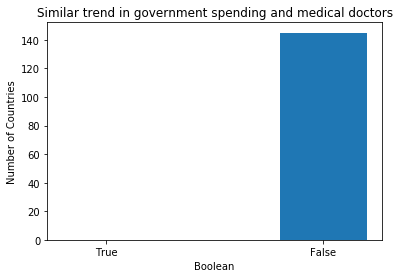

In [140]:
x = [1,3]
y = [0,145]
label = ['True','False']
plot_bar(x,y,label,'Similar trend in government spending and medical doctors','Boolean','Number of Countries')

### Less government spending more out of pocket spending

> To answer this question, I wanted to first cross check if a country with the least average government spending has highest out of pocket spending.

In [141]:
# since the index number doesn't have sequence because of deleted row new to change the index values
row_number = np.arange(0,145,1)
df_outofpocket2.set_index(row_number, inplace = True)

df_govpercent2['mean_value'].min()        # get the minmum mean value
df_govpercent2[df_govpercent2['mean_value'] == 1.05]       # Myanmar has the least government spending

df_outofpocket2_mean = df_outofpocket2.mean(axis = 1)  
df_outofpocket2['mean_value'] = df_outofpocket2_mean
     
    
df_outofpocket2['mean_value'].max()
df_outofpocket2[df_outofpocket2['mean_value'] == 84.9125]    # Myanmar has the highest out of pocket spending 

,country,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,mean_value
85,Myanmar,80.7,83.3,85.3,89.2,88.8,85.9,87.5,83.4,86.1,85.0,90.3,81.3,84.0,84.8,81.9,81.1,84.9125


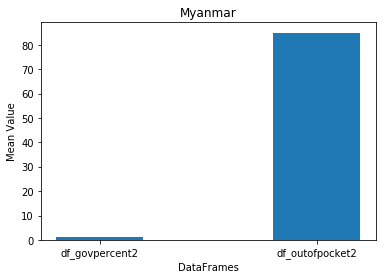

In [142]:
# Showing the above result using bar chart
x = [1,3]
y = [df_govpercent2.loc[85]['mean_value'],df_outofpocket2.loc[85]['mean_value']]
label = ['df_govpercent2','df_outofpocket2']
plot_bar(x,y,label,'Myanmar','DataFrames','Mean Value')

> The above investigation did show a country with low government spending would have high out of pocket spending.
> Before deducing my finding, I needed to make sure if it also proofs in the reverse, which would be, if more government spending would result in less out of pocket expenditure.

In [143]:
# does the reverse state the samething?,No
df_govpercent2['mean_value'].max()        # get the Maximum mean value
df_govpercent2[df_govpercent2['mean_value'] == 22.06875]       # Andorra has the highest government spending
    
df_outofpocket2['mean_value'].min()
df_outofpocket2[df_outofpocket2['mean_value'] == 3.36]    # But Nauru is the one with the least out of pocket spending 

,country,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,mean_value
99,Nauru,3.41,2.85,2.63,2.21,2.67,2.92,3.05,3.17,3.95,2.96,3.82,3.58,2.62,4.0,4.96,4.96,3.36


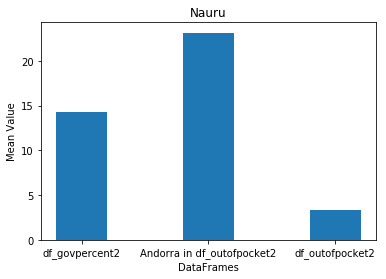

In [144]:
# Showing the above result using bar chart
x = [1,3,5]
y = [df_govpercent2.loc[99]['mean_value'],df_outofpocket2.loc[3]['mean_value'],df_outofpocket2.loc[99]['mean_value']]
label = ['df_govpercent2','Andorra in df_outofpocket2','df_outofpocket2']
plot_bar(x,y,label,'Nauru','DataFrames','Mean Value')

> Because the outcome differs in the above inspections, more digging is needed. 
>That being the case, I tried to verify if my statement is proven by more countries. Countries having below average government spending would have above average out of pocket expenditure and vice versa.

In [146]:
# below average government spending country does they have above average out of pocket spending
mean_govpercent= round(df_govpercent2['mean_value'].mean(),4)
mean_outofpocket = round(df_outofpocket2['mean_value'].mean(),4)

below_mean_govpercent_country = df_govpercent2[df_govpercent2['mean_value'] < mean_govpercent]['country']            # contains 75 countries
above_mean_outofpocket_country = df_outofpocket2[df_outofpocket2['mean_value'] > mean_outofpocket]['country']        # contains 67 countries
print(below_mean_govpercent_country.isin(above_mean_outofpocket_country).value_counts())                # 55 countries have below the average government spending and above average out of pocket spending (out of 67 and 75)  

above_mean_govpercent_country = df_govpercent2[df_govpercent2['mean_value'] > mean_govpercent]['country']            # contains 75 countries    
below_mean_outofpocket_country = df_outofpocket2[df_outofpocket2['mean_value'] < mean_outofpocket]['country']        # contains 78 countries
print(below_mean_outofpocket_country.isin(above_mean_govpercent_country).value_counts())                # 58 countries have above government spending and below average out of pocket spending 

# 55 + 58 = 113 are countries that proof this suggestion, but still it's hard to say there is a correlation or any causation

True     55
False    20
Name: country, dtype: int64
True     58
False    20
Name: country, dtype: int64


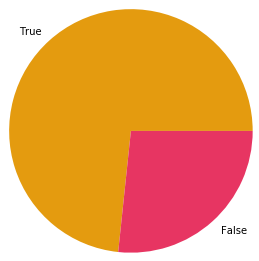

In [147]:
# from the total 75 below average government spending, 55 have above average out of pocket spending while the 20 don't.
plt.pie([55,20],labels = ['True','False'],colors = ['#e49b0f','#e73562'],radius=1.4);

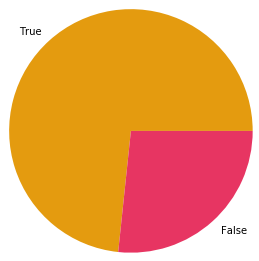

In [148]:
# from the total 78 below average government spending, 58 have above average out of pocket spending while the 20 don't.
plt.pie([55,20],labels = ['True','False'],colors = ['#e49b0f','#e73562'],radius=1.4);

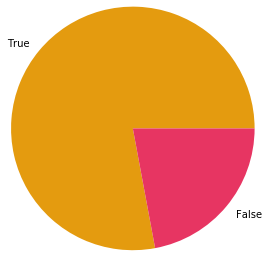

In [149]:
# from the over all 145 countries, 113 countries proof the second question in.
plt.pie([113,32],labels = ['True','False'],colors = ['#e49b0f','#e73562'],radius=1.4);

<a id='conclusions'></a>
## Conclusions

#### Limitation
- The datasets doesn't contain recent data. It only accounts for 1994 - 2009 years.
- The datasets had null values therefore I had to fill these values by the mean values both in column wise in same cases and row wise.
- Inorder to make the analysis, I had to remove countries not found in all three datasets.
- The two datasets government_health_spending_of_total_gov_spending_percent and out_of_pocket_share_of_total_health_spending_percent are in percentage, while medical_doctors_per_1000_people is not. Therefore comparision of this dataset with the exact number might not be correct way of comparing.

#### Region with highest government spending has highest available Medical doctors 
> As seen from the analysis, this statement was disproved. I had used 3 methods to dig deeper to understand if this two had any correlation or causation. On the ***First method***, which was more generalized, I checked if the highest govenment spending country have the highest number of medical doctors.Eventhough **Andorra** was the highest spending government, it was **Italy** which had the highest medical doctors. When we come to the **Second Technique**, I had a qestion if the number of medical doctors increased after the increase of government spending. My answer to this question gave me only **66 out of 145** countries had an increment in medical doctor after government expenditure increased.I included the **Third method** to make sure if there was at least one country which had the same trend of increasing and decreasing in both dataframe,eventhough, **this was not the case**.
> In all the three investigation it was proven the the highest government spending country doesn't have highest available medical doctors.

#### Less government spending more out of pocket spending
> At first, this statment was proven as right but When I tried the reverse it was untrue. I wanted to poke more if this case is correct for the majority of the countries in both ways. The outcome showed **55** *Countries* which had *below* average government expenditure had *above* average out of pocket spending, it also indicate **58** *Countries*  which had *above* average government expenditure had *below* average out of pocket spending.  In total **55 + 58 = 113** *Countries* had verified this quesion. **113** is **(113/145)100% = 77.931%** of the total number of countries, therefore this case is proven to be **Correct**.

<a id='acronym'></a>
## Acronym
- Government spending - government health spending of total government spending percent
- Medical doctors - medical doctors per 1000 people
- Out of pocket spending - out of pocket share of total health spending percent

<a id='resource'></a>
#### Resources 
- https://www.statology.org
- https://www.markdownguide.org/cheat-sheet/
- https://numpy.org
- https://stackoverflow.com
- https://www.educative.io
- https://www.w3schools.com/